<a href="https://colab.research.google.com/github/freha-mezzoudj/Fast-Computation/blob/main/store_fastFood_Image_cnnV1_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "logoDataFastFood.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019) 

In [ ]:
!pip install ipython ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 


In [ ]:
%load_ext autotime

#Classification Code 

https://github.com/chetanstpt/Fast-food-Image-detection/blob/main/FastFoodStore_Classification_CNN_Final%20(1).ipynb

#CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), # Flattening transforms a two-dimensional matrix of features into a vector of features           
    
    tf.keras.layers.Dense(550,activation="relu"), #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax") #Adding the Output Layer
])


The Summary of the model: 

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 64)      

The paramters of the model:

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

adam=Adam(lr=0.001)
model.compile(optimizer='adam',   #Optimiser  used to reduce the cost calculated by cross-entropy
              loss='categorical_crossentropy', #the loss function used to calculate the error
              metrics = ['acc'])     #the metrics used to represent the efficiency of the model


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training and validation data:

In [ ]:
bs=30         #Setting batch size
    
train_dir = "logoDataFastFood/train/"  #Setting training directory
validation_dir = "logoDataFastFood/test/"  #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=bs,
                                                    class_mode='categorical',
                                                    target_size=(180,180))     

# Flow validation images in batches of 20 using test_datagen generator

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))


Found 1465 images belonging to 5 classes.
Found 893 images belonging to 5 classes.


Fitting the model:

In [36]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=50,
                    validation_steps=50 // bs,
                    verbose=2)


RuntimeError: ignored

Try with other parametrs!

In [ ]:
model.save('Final_model_cpu_cnnV1.h5')

In [35]:
import pandas as pd
lc = pd.DataFrame(history.history)
lc

,loss,acc,val_loss,val_acc
0,0.073583,0.986207,3.127622,0.500000
1,0.049673,0.980000,0.793554,0.766667
2,0.034714,0.993333,1.945831,0.700000
3,0.021562,0.993103,1.189753,0.800000
4,0.007425,1.000000,1.463410,0.800000
5,0.002481,1.000000,1.614643,0.833333
6,0.007576,1.000000,0.864772,0.866667
7,0.007280,0.993333,2.855790,0.700000
8,0.002136,1.000000,1.575704,0.833333
9,0.002253,1.000000,2.348097,0.766667


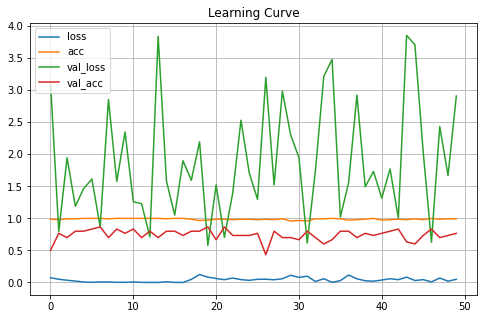

In [37]:
lc.plot(figsize=(8,5))
plt.title("Learning Curve")
plt.grid()